# Local notebook workflow
## Prerequisites
### Neptune configuration file neptune.yaml

```yaml
project: neptune-ml/Sandbox

exclude:
  - neptune.log
  - offline_job.log
  - output
  
parameters:
    power: 3
```
### Offline neptune context

In [79]:
import neptune

ctx = neptune.Context()

neptune: Executing in Offline Mode.


## Typical Problems

Working with on neptune code in local notebooks can be tricky.

For example, normally you cannot access hyperparameters with:

In [ ]:
ctx.params

or use the `.channel_send()` method:

In [ ]:
ctx.channel_send('random_channel', i, 2 + i**2)

## Create a local notebook Context wrapper
Fortunatelly there is a simple solution to those problems.
Use the `LocalNotebookContext` object from the `neptune-contrib` package:

In [80]:
from neptune.contrib.monitoring.notebooks import LocalNotebookContext
ctx = NotebookContext(ctx, config_filepath='neptune.yaml') 

To instantiate it you need to pass the "normal" Neptune `Context` object and the path to your neptune config file.

## Access `.params` 
Now your params are easily available:

In [81]:
ctx.params

AttrDict({'power': 3})

## Use `.channel_send` 
And you can monitor your numerical channels in the notebook output with no problems!

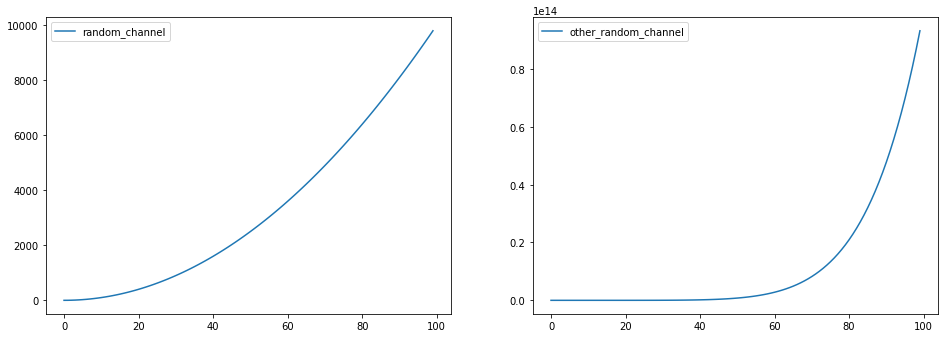

In [82]:
for i in range(100):
    ctx.channel_send('random_channel', i, 2 + i**2)
    ctx.channel_send('other_random_channel', y=5 + i**7)
    ctx.channel_send('text_channel','blabla')

## Run your local Notebook in Neptune
Once you are finished developing your model and you can run your notebook in a top-to-bottom manner 
you can switch to running "normal" neptune job.

### Convert to `.py` and run
Use `jupyter nbconvert` option:
    
```bash
jupyter nbconvert --to script main.py; neptune run --config neptune.yaml main.py
```

You should get something like this:

![image](https://gist.githubusercontent.com/jakubczakon/f754769a39ea6b8fa9728ede49b9165c/raw/d7395f0dfdd9b1dbe1a93ecf03dfc901071ad472/local_nb_workflow.png)